Código para Visualización Combinada (TDCS (EEG10-20)/fNIRS)

In [1]:
#Requirements: pip install mne matplotlib numpy
import mne
import matplotlib.pyplot as plt
import numpy as np

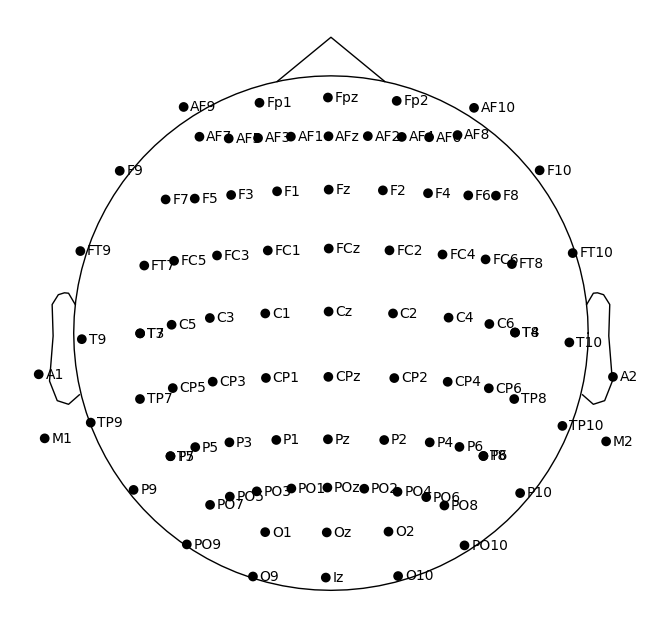

In [2]:
montage_1020 = mne.channels.make_standard_montage('standard_1020')
sfreq = 250 #Frecuencia de muestreo en Hz (arbitraria para este ejemplo)
ch_names = montage_1020.ch_names 
ch_types = ['eeg'] * len(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage(montage_1020)

radio_esfera_m = 0.096 # cm de radio
# La sintaxis de 'sphere' es (origen_x, origen_y, origen_z, radio)
fig = mne.viz.plot_sensors(
    info,
    kind='topomap',      show_names=True, cmap='viridis',
    sphere=[0, 0.015, 0.000, radio_esfera_m], #'eeglab'
    title=f'Disposición 10-20 con Radio Ajustado ({radio_esfera_m} m)')
plt.show()

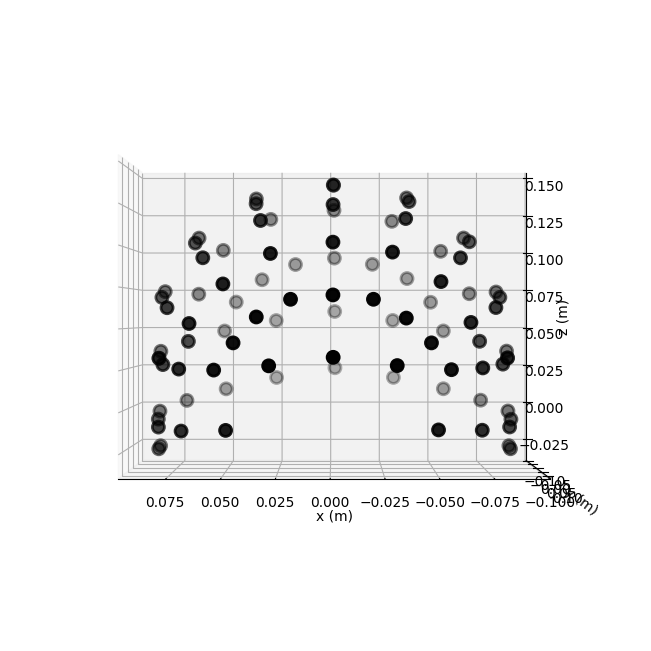

In [3]:
esfera_params = [0, 0.015, 0.001, radio_esfera_m] # (origen_x, origen_y, origen_z, radio)

fig = mne.viz.plot_sensors(
    info,   
    kind='3d', 
    show_names=False, 
    sphere=esfera_params, 
    title=f'Disposición 10-20 3D Mejorada (Radio: {radio_esfera_m} m)',
    ch_type='eeg'   # Asegura que solo se grafiquen los canales EEG
)
ax = fig.gca() 
# Ajustar el ángulo de la vista 3D:
# azim (Azimuth): Ángulo horizontal. 
# elev (Elevation): Ángulo vertical (entre 0° y 90°).
ax.view_init(azim=0, elev=0) # Vista lateral y ligeramente desde arriba

plt.show()

In [4]:
ch_names_array = np.array(info["ch_names"])
column_vector = ch_names_array[:, np.newaxis]
row_vector = column_vector.T
row_vector

array([['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz',
        'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1',
        'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3',
        'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7',
        'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9',
        'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8',
        'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6',
        'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2',
        'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10',
        'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']], dtype='<U4')

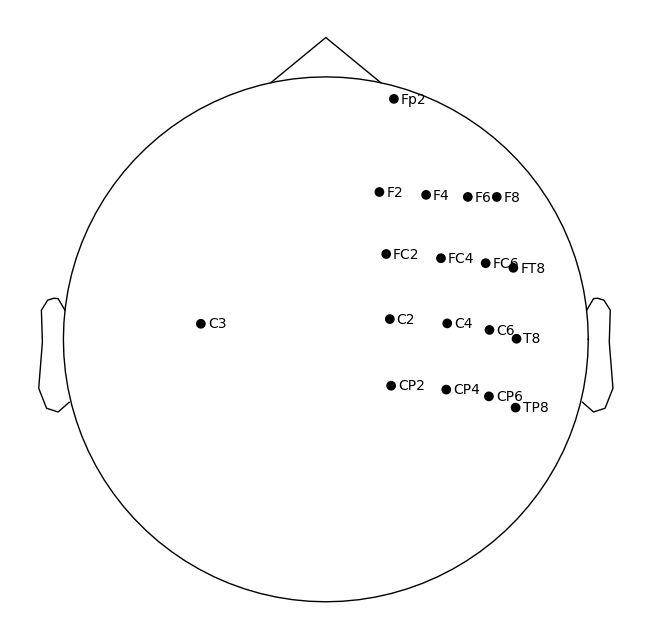

In [5]:
picks = mne.pick_channels(info["ch_names"], include=["Fp2", "C3","F2", "F4", "F6", "F8", "FC2", "FC4", "FC6", "FT8",
                 "C2", "C4", "C6", "T8", "CP2", "CP4", "CP6", "TP8"])
info_subset = mne.pick_info(info, sel=picks)

fig = mne.viz.plot_sensors(
    info_subset,
    kind="topomap",
    show_names=True,
    sphere=[0, 0.015, 0.001, 0.095],
    ch_type="eeg",
    title="Electrodos Fp2 y C3"
)
plt.show()

In [6]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Joan Massich <mailsik@gmail.com>
#          Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

import numpy as np
import mne
from mne.datasets import eegbci, fetch_fsaverage

# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = fs_dir.parent

# The files live in:
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src = fs_dir / "bem" / "fsaverage-ico-5-src.fif"
bem = fs_dir / "bem" / "fsaverage-5120-5120-5120-bem-sol.fif"

0 files missing from root.txt in C:\Users\tamay\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\tamay\mne_data\MNE-fsaverage-data\fsaverage


In [7]:
(raw_fname,) = eegbci.load_data(subjects=1, runs=[6])
raw = mne.io.read_raw_edf(raw_fname, preload=True)

# Clean channel names to be able to use a standard 1005 montage
eegbci.standardize(raw)

# Read and set the EEG electrode locations, which are already in fsaverage's
# space (MNI space) for standard_1020:
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage)
raw.set_eeg_reference(projection=True)  # needed for inverse modeling

# Check that the locations of EEG electrodes is correct with respect to MRI
mne.viz.plot_alignment(
    raw.info,
    src=src,
    eeg=["original", "projected"],
    trans=trans,
    show_axes=True,
    mri_fiducials=True,
    dig="fiducials",
)

Extracting EDF parameters from C:\Users\tamay\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Reading C:\Users\tamay\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif...
Using pyvistaqt 3d backend.
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
Using outer_skin.surf for head surface.
Channel types::	eeg: 64
Projecting sensors to the head surface


In [9]:
# Filtrar solo los canales de interés
picks = mne.pick_channels(raw.info["ch_names"], include=["Fp2", "C3","F2", "F4", "F6", "F8", "FC2", "FC4", "FC6", "FT8",
                 "C2", "C4", "C6", "T8", "CP2", "CP4", "CP6", "TP8"])
info_subset = mne.pick_info(raw.info, sel=picks)

mne.viz.plot_alignment(
    info_subset,
    src=src,
    eeg=["original", "projected"],
    trans=trans,
    show_axes=True,
    mri_fiducials=True,
    dig="fiducials",
)

Reading C:\Users\tamay\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif...
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
Using outer_skin.surf for head surface.
Channel types::	eeg: 18
Projecting sensors to the head surface
